### Data Loading and Exploration

#### Import Required libraries

###### Basic python Libraries

In [3]:
import os         # for folder path operation
import warnings           # to ignore warning message
warnings.filterwarnings('ignore')

###### Data manipulation and analysis

In [4]:
import pandas as pd
import numpy as np

###### Data visualization 

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

##### Exploratory Data Analysis

###### Statistical summary 

In [6]:
from scipy import stats
from scipy.stats import skew,kurtosis

###### Display Settings

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)

###### Data Cleaning Helpers

In [8]:
# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

###### My sql connector

In [9]:
import mysql.connector
from sqlalchemy import create_engine

In [10]:
print("Finally every required libraries are imported")

Finally every required libraries are imported


##### Set Folder path

In [11]:
Folder_path=r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data"

##### Load all csv files

In [12]:
movies_year=pd.read_csv(os.path.join(Folder_path,"Best Movie by Year Netflix.csv"))
movies=pd.read_csv(os.path.join(Folder_path,"Best Movies Netflix.csv"))
show_year=pd.read_csv(os.path.join(Folder_path,"Best Show by Year Netflix.csv"))
shows=pd.read_csv(os.path.join(Folder_path,"Best Shows Netflix.csv"))
credits=pd.read_csv(os.path.join(Folder_path,"raw_credits.csv"))
titles=pd.read_csv(os.path.join(Folder_path,"raw_titles (1).csv"))

##### Basic Exploratory Data Analyst(Check structure of each dataset)

In [13]:
for name,df in {
    "movies_year":movies_year,
    "movies":movies,
    "show_year":show_year,
    "shows":shows,
    "credits":credits,
    "titles":titles
}.items():
    print(f"---{name}---")
    print(df.shape)                    # No. of rows/columns
    print(df.isnull().sum())                #missing value
    print(df.columns)                    # name of columns
    print()

---movies_year---
(49, 6)
index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64
Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

---movies---
(387, 8)
index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
NUMBER_OF_VOTES    0
DURATION           0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64
Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

---show_year---
(31, 7)
index                0
TITLE                0
RELEASE_YEAR         0
SCORE                0
NUMBER_OF_SEASONS    0
MAIN_GENRE           0
MAIN_PRODUCTION      0
dtype: int64
Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

---shows---
(246, 9)
index                0
TITLE                0
RELEASE_YEAR

#### Normality Check (Visual + Statistical)

##### Visual check( Histogram + Q-Q plot)  (for title table)

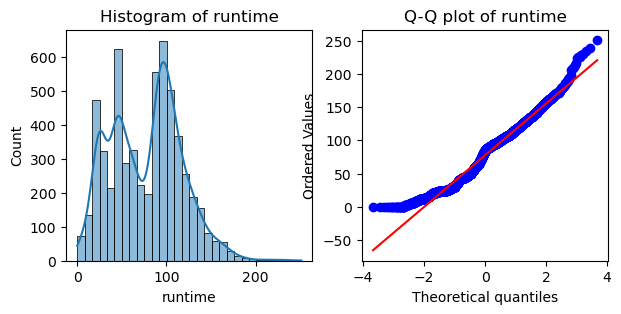

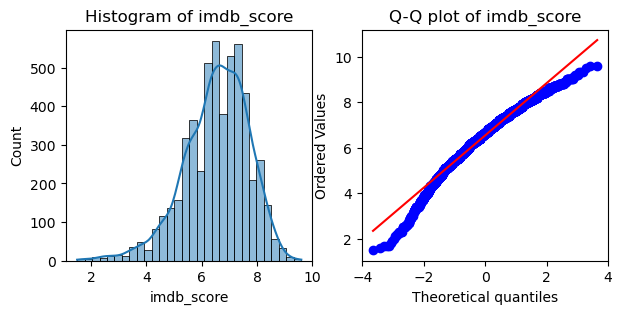

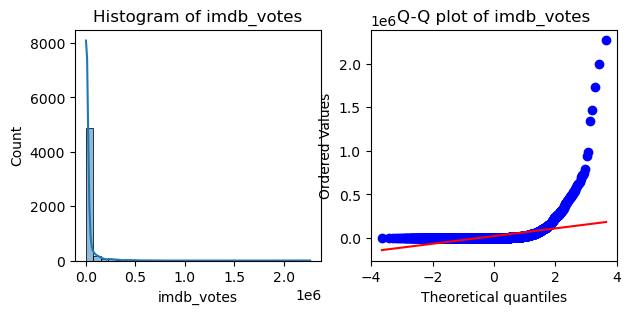

In [14]:
numeric_cols=['runtime','imdb_score','imdb_votes']
for col in numeric_cols:
    plt.figure(figsize=(7,3))
    
    plt.subplot(1,2,1)
    sns.histplot(titles[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(titles[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()
    

#### Statistical check(Shapiro-Wilk test)

In [15]:
from scipy.stats import shapiro

for col in numeric_cols:
    stat,p=shapiro(titles[col].dropna())
    print(f"{col} -> p-value = {p:.5f}")

runtime -> p-value = 0.00000
imdb_score -> p-value = 0.00000
imdb_votes -> p-value = 0.00000


#### Outlier Detection(IQR Method)

In [16]:
for col in numeric_cols:
    Q1=titles[col].quantile(0.25)
    Q3=titles[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    outliers=titles[(titles[col]<lower) | (titles[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

runtime:15 outliers
imdb_score:64 outliers
imdb_votes:804 outliers


#### Outlier Visualization(Boxplots)

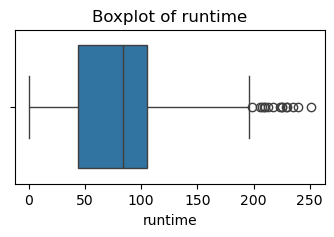

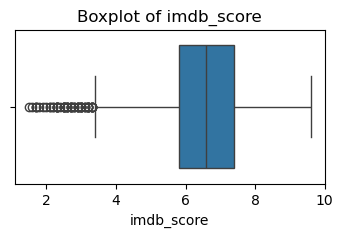

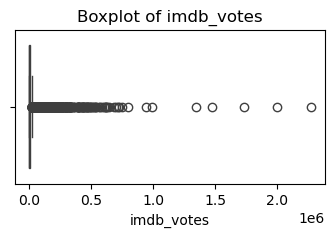

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=titles[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### Outlier handling(for numeric columns)

##### capping(it is best for analysis)

In [18]:
for col in ['runtime','imdb_score','imdb_votes']:
    Q1= titles[col].quantile(0.25)
    Q3=titles[col].quantile(0.75)
    IQR=Q3-Q1
    lower= Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR
    titles[col]=np.where(titles[col]<lower,lower,titles[col])
    titles[col]=np.where(titles[col]>upper,upper,titles[col])

##### check again

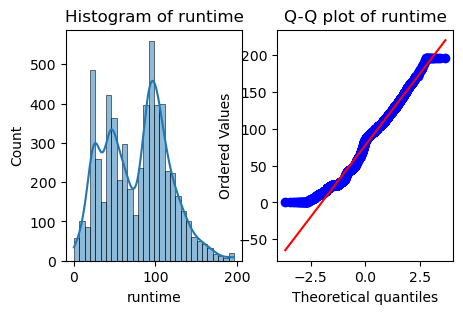

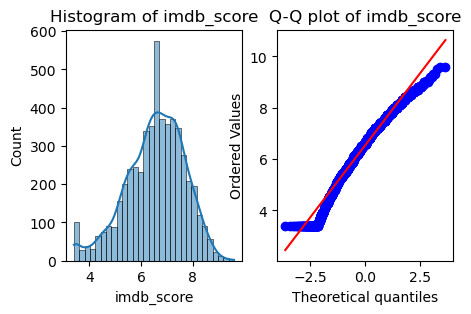

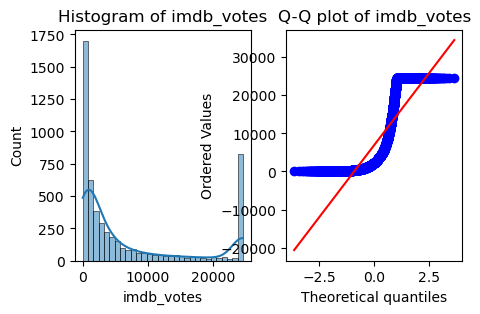

In [19]:
numeric_cols=['runtime','imdb_score','imdb_votes']
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    
    plt.subplot(1,2,1)
    sns.histplot(titles[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(titles[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()
    

#### Transformation (for skewed columns)

In [20]:
# Apply log transformation only to imdb_votes
titles['imdb_votes_log']=np.log1p(titles['imdb_votes'])   #log1p handles zero values safely

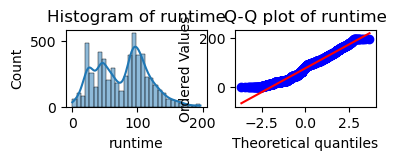

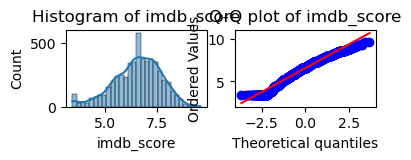

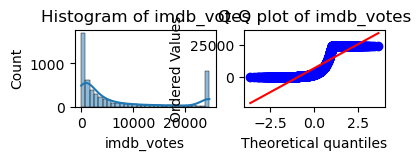

In [21]:
###again check
numeric_cols=['runtime','imdb_score','imdb_votes']
for col in numeric_cols:
    plt.figure(figsize=(4,1))
    
    plt.subplot(1,2,1)
    sns.histplot(titles[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(titles[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [22]:
#### againg capping/winsorization
upper_limit=df['imdb_votes'].quantile(0.95)
df['imdb_votes']=np.where(df['imdb_votes']>upper_limit,upper_limit,df['imdb_votes'])

In [23]:
# againg apply transform on the imdb_votes
titles['imdb_votes_log']=np.log1p(titles['imdb_votes']) 

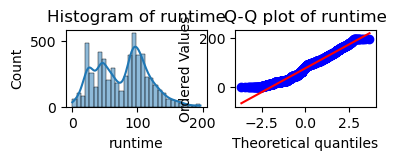

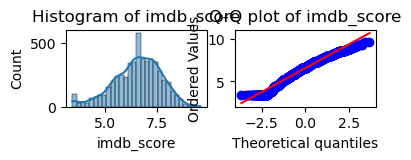

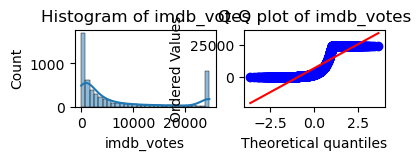

In [24]:
###again check
numeric_cols=['runtime','imdb_score','imdb_votes']
for col in numeric_cols:
    plt.figure(figsize=(4,1))
    
    plt.subplot(1,2,1)
    sns.histplot(titles[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(titles[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

### for imdb_vote still this column looks sweked that's we try options

In [25]:
##### Option A- Square-root transform
titles['imdb_votes_sqrt']=np.sqrt(titles['imdb_votes'])

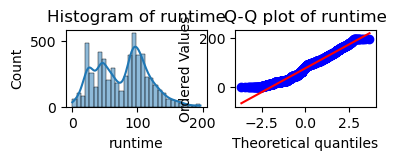

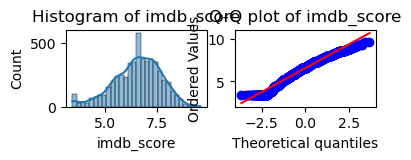

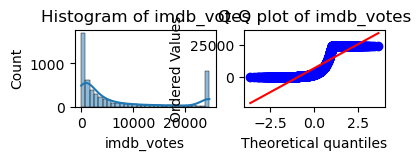

In [26]:
###again check
numeric_cols=['runtime','imdb_score','imdb_votes']
for col in numeric_cols:
    plt.figure(figsize=(4,1))
    
    plt.subplot(1,2,1)
    sns.histplot(titles[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(titles[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [27]:
###Option B — Cube-root transform:
titles['imdb_votes_cuberoot'] = np.cbrt(titles['imdb_votes'])

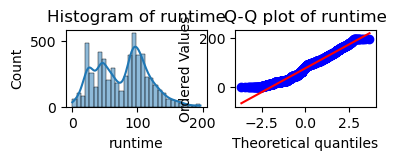

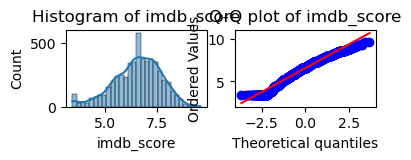

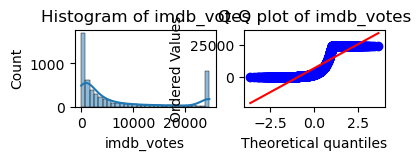

In [28]:
###again check
numeric_cols=['runtime','imdb_score','imdb_votes']
for col in numeric_cols:
    plt.figure(figsize=(4,1))
    
    plt.subplot(1,2,1)
    sns.histplot(titles[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(titles[col].dropna(), dist="norm" , plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [29]:
###Option C — Box-Cox transform (best mathematically, but needs positive data only

# Step 1: Replace 0 or negative with small positive (Box–Cox needs > 0)
titles['imdb_votes_fixed'] = titles['imdb_votes'].apply(lambda x: x + 1 if x <= 0 else x)

# Step 2: Dropna temporarily and apply transformation only on valid rows
valid_data = titles['imdb_votes_fixed'].dropna()

# Step 3: Apply Box–Cox transformation
transformed, lam = stats.boxcox(valid_data)

print("Lambda value used:", lam)

# Step 4: Assign transformed values back safely (align by index)
titles.loc[valid_data.index, 'imdb_votes_boxcox'] = transformed


Lambda value used: 0.12213651823769164


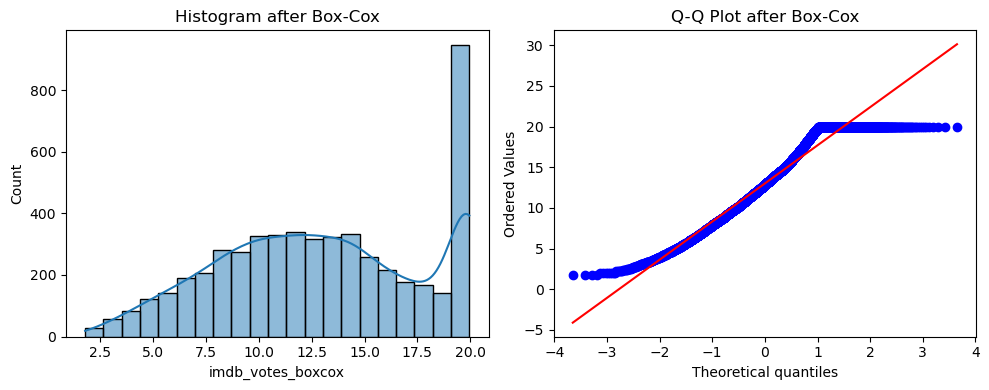

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(titles['imdb_votes_boxcox'].dropna(), kde=True, ax=ax[0])
ax[0].set_title("Histogram after Box-Cox")

stats.probplot(titles['imdb_votes_boxcox'].dropna(), dist="norm", plot=ax[1])
ax[1].set_title("Q-Q Plot after Box-Cox")

plt.tight_layout()
plt.show()


In [31]:
titles.isnull().sum()


index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
imdb_votes_log           539
imdb_votes_sqrt          539
imdb_votes_cuberoot      539
imdb_votes_fixed         539
imdb_votes_boxcox        539
dtype: int64

#### Code to Handle All Missing Values inn (title table)

In [32]:
# Categorical columns – fill with mode
titles['title'].fillna(titles['title'].mode()[0], inplace=True)
titles['age_certification'].fillna(titles['age_certification'].mode()[0], inplace=True)

# Numeric columns – fill with median or mean
titles['seasons'].fillna(titles['seasons'].median(), inplace=True)
titles['imdb_score'].fillna(titles['imdb_score'].mean(), inplace=True)
titles['imdb_votes'].fillna(titles['imdb_votes'].median(), inplace=True)

# Derived columns – same filling as imdb_votes
titles['imdb_votes_log'].fillna(titles['imdb_votes_log'].median(), inplace=True)
titles['imdb_votes_sqrt'].fillna(titles['imdb_votes_sqrt'].median(), inplace=True)
titles['imdb_votes_cuberoot'].fillna(titles['imdb_votes_cuberoot'].median(), inplace=True)
titles['imdb_votes_fixed'].fillna(titles['imdb_votes_fixed'].median(), inplace=True)
titles['imdb_votes_boxcox'].fillna(titles['imdb_votes_boxcox'].median(), inplace=True)

# imdb_id – drop since it's an identifier
titles.drop(columns=['imdb_id'], inplace=True)


#### Drop Unnecessary columns

In [33]:
titles.drop(columns=['index'],inplace=True,errors='ignore')

#### Handle Duplicates

In [34]:
titles.duplicated().sum()
titles.drop_duplicates(inplace=True)

#### check another table (orders)

In [35]:
credits.isnull().sum()     

index           0
person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [36]:
 #these are identifiers columns,not numericalmeasures(like salary,vote,etc),
#so outliers detection is not needed fopr these columns,because:
#----they don't represent measurable values
#-----unusually large/small IDs are not 'outliers';ther are just different IDs.

##### Verify Data type

In [37]:
credits.dtypes

index         int64
person_id     int64
id           object
name         object
character    object
role         object
dtype: object

In [38]:
#optional check (just to be sure)

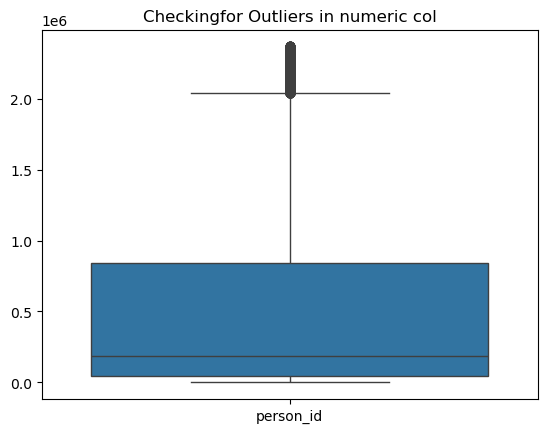

In [39]:
sns.boxplot(data=credits[['person_id','id']])
plt.title("Checkingfor Outliers in numeric col")
plt.show()

##### Handle Missing Values

In [40]:
credits['character'].fillna("Not Appplicable",inplace=True)

##### Drop Unnecessary Column

In [41]:
credits.drop(columns=['index'],inplace=True)

##### Handle duplicates value

In [42]:
credits.duplicated().sum()
credits.drop_duplicates(inplace=True)

#### now it's time to handle another table(shows)

In [43]:
shows.info()   # there are so many columns are integer, so we have to check normality and outliers and handle it if columns have outliers in a heavy range

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              246 non-null    int64  
 1   TITLE              246 non-null    object 
 2   RELEASE_YEAR       246 non-null    int64  
 3   SCORE              246 non-null    float64
 4   NUMBER_OF_VOTES    246 non-null    int64  
 5   DURATION           246 non-null    int64  
 6   NUMBER_OF_SEASONS  246 non-null    int64  
 7   MAIN_GENRE         246 non-null    object 
 8   MAIN_PRODUCTION    246 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 17.4+ KB


#### Normality check (For each numeric col)

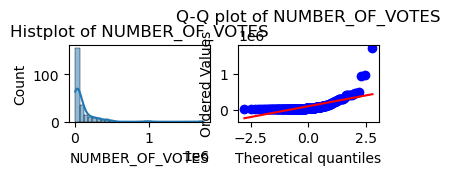

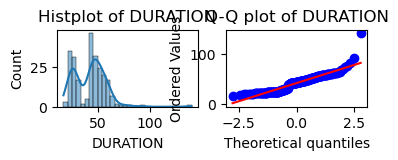

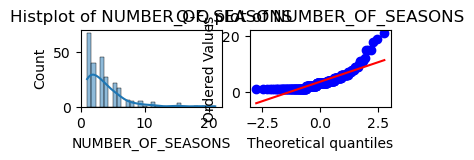

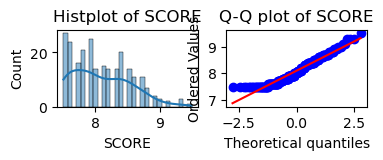

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_colls=['NUMBER_OF_VOTES','DURATION','NUMBER_OF_SEASONS','SCORE']
for col in numeric_colls:
    plt.figure(figsize=(4,1))

    plt.subplot(1,2,1)
    sns.histplot(shows[col],kde=True,bins=30)
    plt.title(f"Histplot of {col}")

    plt.subplot(1,2,2)
    stats.probplot(shows[col].dropna(),dist="norm",plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

#### Statistical check(Shapiro-Wilk test)

In [45]:
from scipy.stats import shapiro
for col in numeric_colls:
    stat,p=shapiro(shows[col].dropna())
    print(f"{col} -> p-value = {p:.5f}")

NUMBER_OF_VOTES -> p-value = 0.00000
DURATION -> p-value = 0.00000
NUMBER_OF_SEASONS -> p-value = 0.00000
SCORE -> p-value = 0.00000


#### Outliers Detection(IQR Method)

In [46]:
for col in numeric_colls:
    Q1=shows[col].quantile(0.25)
    Q3=shows[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outliers=shows[(shows[col]<lower) | (shows[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

NUMBER_OF_VOTES:27 outliers
DURATION:2 outliers
NUMBER_OF_SEASONS:7 outliers
SCORE:1 outliers


##### Outlier Visualization(BoxplotS)

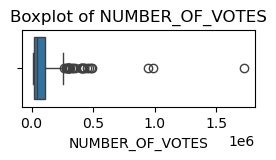

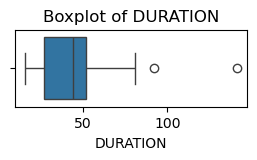

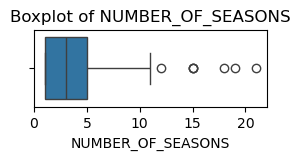

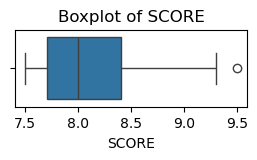

In [47]:
for col in numeric_colls:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=shows[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Outliers handling(for numeric columns)

###### capping(it's best for analysis)

In [48]:
for col in ['NUMBER_OF_VOTES','DURATION','NUMBER_OF_SEASONS','SCORE']:
    Q1=shows[col].quantile(0.25)
    Q3=shows[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 - 1.5*IQR
    shows[col]=np.where(shows[col]<lower,lower,shows[col])
    shows[col]=np.where(shows[col]>upper,upper,shows[col])


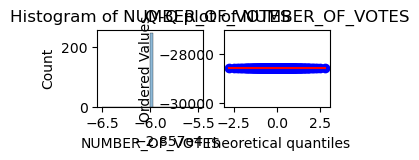

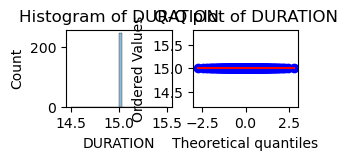

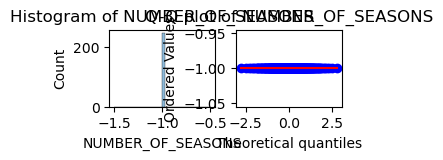

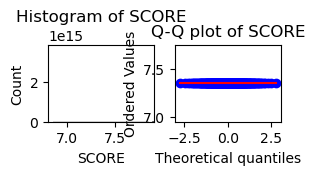

In [49]:
###check again
numeric_colls=['NUMBER_OF_VOTES','DURATION','NUMBER_OF_SEASONS','SCORE']
for col in numeric_colls:
    plt.figure(figsize=(3,1))

    plt.subplot(1,2,1)
    sns.histplot(shows[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(shows[col].dropna(),dist="norm" ,plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

    




#### Drop Unnecessary columns

In [50]:
shows.drop(columns=['index'],inplace=True,errors='ignore')

##### handle duplicates

In [51]:
shows.duplicated().sum()
shows.drop_duplicates(inplace=True)

#### now another one's(show_year)

In [52]:
show_year.info()
show_year.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              31 non-null     int64  
 1   TITLE              31 non-null     object 
 2   RELEASE_YEAR       31 non-null     int64  
 3   SCORE              31 non-null     float64
 4   NUMBER_OF_SEASONS  31 non-null     int64  
 5   MAIN_GENRE         31 non-null     object 
 6   MAIN_PRODUCTION    31 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ KB


index                0
TITLE                0
RELEASE_YEAR         0
SCORE                0
NUMBER_OF_SEASONS    0
MAIN_GENRE           0
MAIN_PRODUCTION      0
dtype: int64

#### Normality check(for each numeric col)(Histogram+ Q-Q plot)

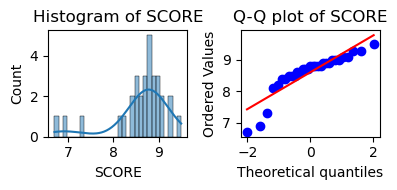

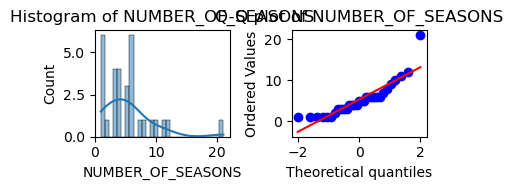

In [53]:
numeric_colls=['SCORE','NUMBER_OF_SEASONS']
for col in numeric_colls:
    plt.figure(figsize=(4,2))

    plt.subplot(1,2,1)
    sns.histplot(show_year[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(show_year[col].dropna(),dist="norm",plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.tight_layout()
    plt.show()
  

##### statistical check(shiper-wilk test)

In [54]:
for col in ['SCORE','NUMBER_OF_SEASONS']:
    stat,p=shapiro(show_year[col])
    print(f"{col} -> p-value :{p:.5f}")

SCORE -> p-value :0.00011
NUMBER_OF_SEASONS -> p-value :0.00018


### Outlier detection 

In [55]:
for col  in ['SCORE', 'NUMBER_OF_SEASONS']:
    Q1=show_year[col].quantile(0.25)
    Q3=show_year[col].quantile(0.75)
    IQR=Q3 -Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=show_year[(show_year[col]<lower) | (show_year[col]>upper)]
    print(f"{col}:{len(outliers)}outliers")

SCORE:3outliers
NUMBER_OF_SEASONS:3outliers


##### outlier visualization

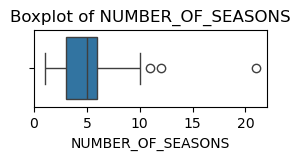

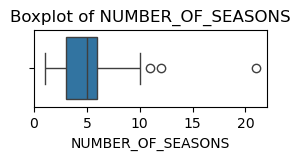

In [56]:
numeric_collls=['SCORE', 'NUMBER_OF_SEASONS']
for i in numeric_collls:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=show_year[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### outlier handling

In [57]:
for col in ['SCORE', 'NUMBER_OF_SEASONS']:
    Q1 = show_year[col].quantile(0.25)
    Q3 = show_year[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    show_year[col]=np.where(show_year[col]<lower,lower,show_year[col])
    show_year[col]=np.where(show_year[col]>upper,upper,show_year[col])

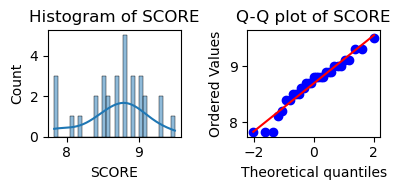

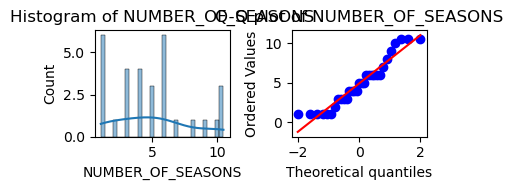

In [58]:
numeric_colls=['SCORE','NUMBER_OF_SEASONS']
for col in numeric_colls:
    plt.figure(figsize=(4,2))

    plt.subplot(1,2,1)
    sns.histplot(show_year[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(show_year[col].dropna(),dist="norm",plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.tight_layout()
    plt.show()

In [59]:
show_year.isnull().sum()

index                0
TITLE                0
RELEASE_YEAR         0
SCORE                0
NUMBER_OF_SEASONS    0
MAIN_GENRE           0
MAIN_PRODUCTION      0
dtype: int64

#### Drop unneccessary column 

In [60]:
show_year.drop(columns=['index'],inplace=True,errors='ignore')

##### Handle duplicate values

In [61]:
show_year.duplicated().sum()
show_year.drop_duplicates(inplace=True)

#### Now turn to handle another table (movies)

In [62]:
movies.info()
movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            387 non-null    int64  
 1   TITLE            387 non-null    object 
 2   RELEASE_YEAR     387 non-null    int64  
 3   SCORE            387 non-null    float64
 4   NUMBER_OF_VOTES  387 non-null    int64  
 5   DURATION         387 non-null    int64  
 6   MAIN_GENRE       387 non-null    object 
 7   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 24.3+ KB


index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
NUMBER_OF_VOTES    0
DURATION           0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64

##### Normality check(for each numeric col)(Histogram+ Q-Q plot) 

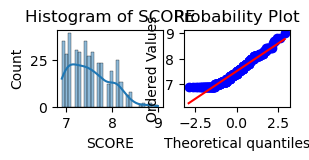

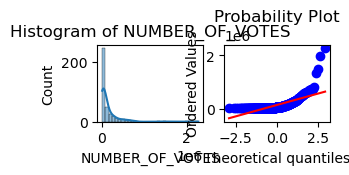

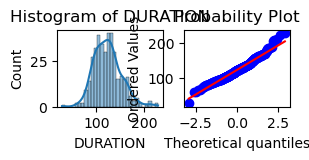

In [63]:
col_numeric=['SCORE','NUMBER_OF_VOTES','DURATION']
for col in col_numeric:
    plt.figure(figsize=(3,1))

    plt.subplot(1,2,1)
    sns.histplot(movies[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(movies[col].dropna(),dist="norm",plot=plt)
    plt.show()

##### Statistical check(Shapiro-Wilk Test)

In [64]:
for col in ['SCORE','NUMBER_OF_VOTES','DURATION']:
    stat,p=shapiro(movies[col].dropna())
    print(f"{col} -> p-value ={p:.5f}")

SCORE -> p-value =0.00000
NUMBER_OF_VOTES -> p-value =0.00000
DURATION -> p-value =0.00002


#### Outlier Detection

In [65]:
for col in ['SCORE','NUMBER_OF_VOTES','DURATION']:
    Q1=movies[col].quantile(0.25)
    Q3=movies[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outliers=movies[(movies[col]<lower) | (movies[col]> upper)]
    print(f"{col}:{len(outliers)} outliers")

SCORE:1 outliers
NUMBER_OF_VOTES:40 outliers
DURATION:7 outliers


##### Outliers Visualization

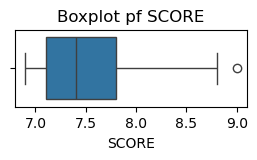

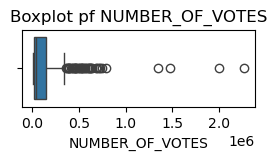

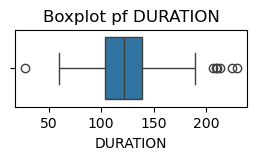

In [67]:
for col in ['SCORE','NUMBER_OF_VOTES','DURATION']:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=movies[col])
    plt.title(f"Boxplot pf {col}")
    plt.show()

#### now tries to handle outliers of columns

##### Outlier Handle

In [ ]:
##### there is no need to handle the outlier  (score)  it is close to normal...
####we only have to check outliers for duration and num of votes

#### IQR based capping method

In [68]:
movies.columns

Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

In [69]:
movies.columns = movies.columns.str.strip()

In [70]:
print(movies.columns.tolist())


['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION']


In [71]:
#### i had wrote this because i gave e error of dtype

In [72]:
movies['NUMBER_OF_VOTES'] = pd.to_numeric(movies['NUMBER_OF_VOTES'], errors='coerce')
movies['DURATION'] = pd.to_numeric(movies['DURATION'], errors='coerce')


In [73]:
for col in ['NUMBER_OF_VOTES','DURATION']:
    Q1=movies[col].quantile(0.25)
    Q3=movies[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5 *IQR
    movies[col]=np.where(movies[col]<lower,lower,movies[col])
    movies[col]=np.where(movies[col]>upper,upper,movies[col])
    

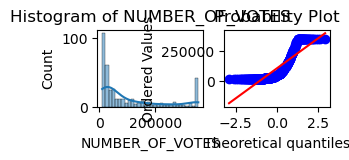

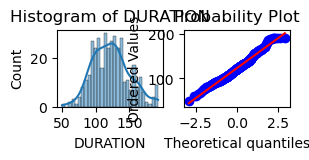

In [74]:
### now check again
col_numeric=['NUMBER_OF_VOTES','DURATION']
for col in col_numeric:
    plt.figure(figsize=(3,1))

    plt.subplot(1,2,1)
    sns.histplot(movies[col],kde=True,bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(movies[col].dropna(),dist="norm",plot=plt)
    plt.show()

In [75]:
##### Extract column name (to handle unnessecary error)

In [76]:
print(movies.columns.tolist())


['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION']


In [77]:
#### it will clean the space ,underscocores ,unicodecharacters

In [78]:
movies.columns = movies.columns.str.strip().str.replace(' ', '_').str.replace('\u200b', '')


In [79]:
movies['NUMBER_OF_VOTES'].describe()


count       387.000000
mean     104782.971576
std      115628.613951
min       10139.000000
25%       20512.500000
50%       45200.000000
75%      153485.500000
max      352945.000000
Name: NUMBER_OF_VOTES, dtype: float64

In [80]:
movies['NUMBER_OF_VOTES'] = (
    movies['NUMBER_OF_VOTES']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('K', '000', regex=False)
    .astype(float)
)


In [81]:
movies['NUMBER_OF_VOTES'].describe()


count       387.000000
mean     104782.971576
std      115628.613951
min       10139.000000
25%       20512.500000
50%       45200.000000
75%      153485.500000
max      352945.000000
Name: NUMBER_OF_VOTES, dtype: float64

In [82]:
movies['NUMBER_OF_VOTES'].isna().sum()


0

In [83]:
movies['NUMBER_OF_VOTES'].head(20)


0      31180.0
1     352945.0
2     352945.0
3      20595.0
4      44074.0
5     352945.0
6     352945.0
7     180247.0
8      14356.0
9      11973.0
10     25687.0
11    352945.0
12     20611.0
13     13680.0
14     17710.0
15    342335.0
16    352945.0
17    188234.0
18     11488.0
19    352945.0
Name: NUMBER_OF_VOTES, dtype: float64

###### Dropping the the column

In [84]:
movies.drop(columns=['NUMBER_OF_VOTES'],inplace=True)

In [85]:
print('NUMBER_OF_VOTES column dropped because all values were NAN')

NUMBER_OF_VOTES column dropped because all values were NAN


In [86]:
### check again the info
movies.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            387 non-null    int64  
 1   TITLE            387 non-null    object 
 2   RELEASE_YEAR     387 non-null    int64  
 3   SCORE            387 non-null    float64
 4   DURATION         387 non-null    float64
 5   MAIN_GENRE       387 non-null    object 
 6   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 21.3+ KB


In [87]:
### check whether duplicates exists
movies.duplicated().sum()

0

##### Now move to next table(movies_year)

In [88]:
movies_year.info()
movies_year.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            49 non-null     int64  
 1   TITLE            49 non-null     object 
 2   RELEASE_YEAR     49 non-null     int64  
 3   SCORE            49 non-null     float64
 4   MAIN_GENRE       49 non-null     object 
 5   MAIN_PRODUCTION  49 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ KB


index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64

#### Normality check for numeric cols

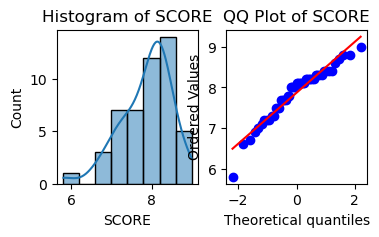

In [89]:
col_nume=['SCORE']
for i in col_nume:
    plt.figure(figsize=(4,2))
    
    plt.subplot(1,2,1)
    sns.histplot(movies_year['SCORE'], kde=True)
    plt.title("Histogram of SCORE")

    plt.subplot(1,2,2)
    stats.probplot(movies_year['SCORE'], dist="norm", plot=plt)
    plt.title("QQ Plot of SCORE")

    plt.show()


In [90]:
for col in col_nume:
    stat,p=shapiro(movies_year[col].dropna())
    print(f"{col} -> p-value={p:.5f}")

SCORE -> p-value=0.01591


In [91]:
#### check whether duplicates exists
movies.duplicated().sum()

0

In [92]:
for name,df in {
    "movies_year":movies_year,
    "movies":movies,
    "show_year":show_year,
    "shows":shows,
    "credits":credits,
    "titles":titles
}.items():
    print(f"---{name}---")
    print(df.shape)                    # No. of rows/columns
    print(df.isnull().sum())                #missing value
    print(df.columns)                    # name of columns
    print()

---movies_year---
(49, 6)
index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64
Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

---movies---
(387, 7)
index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
DURATION           0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64
Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

---show_year---
(31, 6)
TITLE                0
RELEASE_YEAR         0
SCORE                0
NUMBER_OF_SEASONS    0
MAIN_GENRE           0
MAIN_PRODUCTION      0
dtype: int64
Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

---shows---
(246, 8)
TITLE                0
RELEASE_YEAR         0
SCORE                0
NUMBER_OF_VOTES      0
DURATION             0
NUMBER_OF_SEASO

#### Export Cleaned data in the csv file 

In [93]:
movies.to_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\movies_cleaned.csv",index=False)
shows.to_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\shows_cleaned.csv",index=False)
credits.to_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\credits_cleaned.csv",index=False)
titles.to_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\titles_cleaned.csv",index=False)
movies_year.to_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\movies_year_cleaned.csv",index=False)
show_year.to_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\show_year_cleaned.csv",index=False)

#### Data is imported in mysql via python 

In [1]:
import pandas as pd
import mysql.connector

In [33]:
#### cleaned file path(for movies)
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\movies_cleaned.csv")

##### Connect to Mysql

In [34]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="movies_analysis"
)
cursor = conn.cursor()

In [35]:
print(df.columns)

Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'DURATION', 'MAIN_GENRE',
       'MAIN_PRODUCTION'],
      dtype='object')


In [36]:
df.rename(columns={
    'index':'id',
    'TITLE':'TITLE',
    'RELEASE_YEAR':'RELEASE_YEAR',
    'SCORE':'SCORE',
    'DURATION':'DURATION',
    'MAIN_GENRE':'MAIN_GENRE',
    'MAIN_PRODUCTION':'MAIN_PRODUCTION'
}, inplace=True)

In [37]:
print(df.head())

   id                                     TITLE  RELEASE_YEAR  SCORE  \
0   0  David Attenborough: A Life on Our Planet          2020    9.0   
1   1                                 Inception          2010    8.8   
2   2                              Forrest Gump          1994    8.8   
3   3                                Anbe Sivam          2003    8.7   
4   4                        Bo Burnham: Inside          2021    8.7   

   DURATION   MAIN_GENRE MAIN_PRODUCTION  
0      83.0  documentary              GB  
1     148.0        scifi              GB  
2     142.0        drama              US  
3     160.0       comedy              IN  
4      87.0       comedy              US  


In [38]:
#### Insert data (movies)
for i,row in df.iterrows():
    cursor.execute("""
         INSERT INTO movies (TITLE,RELEASE_YEAR,SCORE,DURATION,MAIN_GENRE,MAIN_PRODUCTION)
         VALUES (%s,%s,%s,%s,%s,%s)
    """,(
        row['TITLE'],
        row['RELEASE_YEAR'],
        row['SCORE'],
        row['DURATION'],
        row['MAIN_GENRE'],
        row['MAIN_PRODUCTION']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [39]:
#### Insert data into (movies_year)
df1=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\movies_year_cleaned.csv")

In [40]:
df1.columns

Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE',
       'MAIN_PRODUCTION'],
      dtype='object')

In [41]:
df1.rename(columns={
    'index':'id',
    'TITLE':'TITLE',
    'RELEASE_YEAR':'RELEASE_YEAR',
    'SCORE':'SCORE',
    'MAIN_GENRE':'MAIN_GENRE',
    'MAIN_PRODUCTION':'MAIN_PRODUCTION'
}, inplace=True)

In [42]:
df1.head()

,id,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
0,0,White Christmas,1954,7.5,romance,US
1,1,The Guns of Navarone,1961,7.5,war,US
2,2,My Fair Lady,1964,7.8,drama,US
3,3,Bonnie and Clyde,1967,7.7,drama,US
4,4,Dirty Harry,1971,7.7,thriller,US


In [43]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="movies_analysis"
)
cursor = conn.cursor()

In [44]:
#### Insert data (movies_year)
for i,row in df1.iterrows():
    cursor.execute("""
         INSERT INTO movies_year (TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION)
         VALUES (%s,%s,%s,%s,%s)
    """,(
        row['TITLE'],
        row['RELEASE_YEAR'],
        row['SCORE'],
        row['MAIN_GENRE'],
        row['MAIN_PRODUCTION']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [45]:
#### Insert data into a show_year
df2=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\show_year_cleaned.csv")

In [46]:
df2.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS', 'MAIN_GENRE',
       'MAIN_PRODUCTION'],
      dtype='object')

In [47]:
df2.rename(columns={
    'TITLE':'TITLE',
    'RELEASE_YEAR':'RELEASE_YEAR',
    'SCORE':'SCORE',
    'NUMBER_OF_SEASONS':'NUMBER_OF_SEASONS',
    'MAIN_GENRE':'MAIN_GENRE',
    'MAIN_PRODUCTION':'MAIN_PRODUCTION'
}, inplace=True)

In [48]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="movies_analysis"
)
cursor = conn.cursor()

In [49]:
#### Insert data (show_year)
for i,row in df2.iterrows():
    cursor.execute("""
         INSERT INTO show_year (TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION)
         VALUES (%s,%s,%s,%s,%s,%s)
    """,(
        row['TITLE'],
        row['RELEASE_YEAR'],
        row['SCORE'],
        row['NUMBER_OF_SEASONS'],
        row['MAIN_GENRE'],
        row['MAIN_PRODUCTION']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [50]:
###Now insert data into shows
df3=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\shows_cleaned.csv")

In [51]:
df3.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'NUMBER_OF_SEASONS', 'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')

In [57]:
df3.rename(columns={
    'TITLE':'TITLE',
    'RELEASE_YEAR':'RELEASE_YEAR',
    'SCORE':'SCORE',
    'NUMBER_OF_VOTES':'NUMBER_OF_VOTES',
    'DURATION':'DURATION',
    'NUMBER_OF_SEASONS':'NUMBER_OF_SEASONS',
    'MAIN_GENRE':'MAIN_GENRE',
    'MAIN_PRODUCTION':'MAIN_PRODUCTION'
}, inplace=True)

In [58]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="movies_analysis"
)
cursor = conn.cursor()

In [60]:
#### Insert data (shows)
for i,row in df3.iterrows():
    cursor.execute("""
         INSERT INTO shows (TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION)
         VALUES (%s,%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['TITLE'],
        row['RELEASE_YEAR'],
        row['SCORE'],
        row['NUMBER_OF_VOTES'],
        row['DURATION'],
        row['NUMBER_OF_SEASONS'],
        row['MAIN_GENRE'],
        row['MAIN_PRODUCTION']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [6]:
####insert data into credits
df4=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\credits_cleaned.csv")

In [7]:
df4.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [8]:
df4.rename(columns={
    'person_id':'person_id',
    'id':'title_id',
    'name':'name',
    'character':'character_name',
    'role':'role'
},inplace=True)

In [9]:
import pandas as pd
import mysql.connector

In [10]:
# connect with cursor 
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="movies_analysis"
)
cursor = conn.cursor()

In [11]:
#### Prepare the insert query(make sure column name same as mysql table)
query= """
    INSERT INTO credits(person_id,title_id,name,character_name,role)
    VALUES (%s,%s,%s,%s,%s)
"""
# convert dataframe into list of tuples(for excutemany)
data=[tuple(row) for row in df4.to_numpy()]

#Batch insert (to avoid timeout)
batch_size=1000 ##1000 rows per insert 
for i in range(0,len(data),batch_size):
    batch=data[i:i+batch_size]
    cursor.executemany(query,batch)
    conn.commit()
    print(f"Inserted row {i+1} to {i+len(batch)}")
#close connection
cursor.close()
conn.close()

print("All data inserted successfully without timeout!")
    
        

Inserted row 1 to 1000
Inserted row 1001 to 2000
Inserted row 2001 to 3000
Inserted row 3001 to 4000
Inserted row 4001 to 5000
Inserted row 5001 to 6000
Inserted row 6001 to 7000
Inserted row 7001 to 8000
Inserted row 8001 to 9000
Inserted row 9001 to 10000
Inserted row 10001 to 11000
Inserted row 11001 to 12000
Inserted row 12001 to 13000
Inserted row 13001 to 14000
Inserted row 14001 to 15000
Inserted row 15001 to 16000
Inserted row 16001 to 17000
Inserted row 17001 to 18000


DataError: 1406 (22001): Data too long for column 'character_name' at row 22

In [12]:
### now 18000 rows is enough i don't want soove this bug 


In [2]:
import mysql.connector
import pandas as pd

In [3]:
#### Insert data into title (finaaly this is the last table)
df5=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\netflix project(mysql,etl,powerbi)\data\cleaned_data\titles_cleaned.csv")

In [4]:
df5.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'imdb_votes_log', 'imdb_votes_sqrt', 'imdb_votes_cuberoot',
       'imdb_votes_fixed', 'imdb_votes_boxcox'],
      dtype='object')

In [5]:
#### select only matching cols with mysql 
df5=df5[['id', 'title', 'release_year', 'age_certification', 'runtime',
            'genres', 'production_countries', 'seasons',
            'imdb_score', 'imdb_votes']]

In [6]:
df5.rename(columns={
    'id':'id',
    'title':'title',
    'release_year':'release_year',
    'age_certification':'age_certification',
    'runtime':'runtime',
    'genres':'genres',
    'production_countries':'production_countries',
    'seasons':'seasons',
    'imdb_score':'imdb_score',
    'imdb_votes':'imdb_votes'
},inplace=True)

In [7]:
#handle nan again if any has still nan value after handling 
df5=df5.where(pd.notnull(df5),None)

In [8]:
##  connect to mysql againn
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="movies_analysis"
)
cursor=conn.cursor()
query="""
   INSERT INTO titles(id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes)
   VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
"""
## Convert Dataframe rows into list of tuples
data=[tuple(x) for x in df5.values]

##Insert all rows(fast method)
cursor.executemany(query,data)
conn.commit()
print(f"{cursor.rowcount} records insertes successfully!")
cursor.close()
conn.close()




5806 records insertes successfully!
